<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/practice_230403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

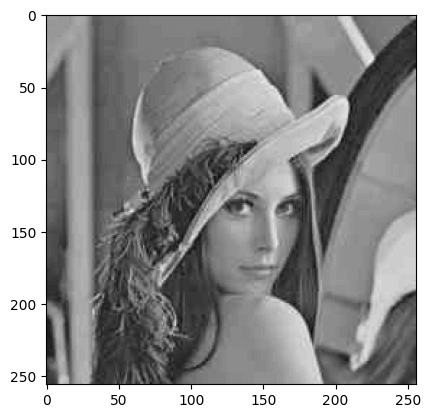

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
src = cv2.imread('input.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.imshow(src, cmap='gray')

In [2]:
"""import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('input.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.imshow(src, cmap='gray')"""

# 영상 내 transformation function을 적용하기 위한 함수는 다음과 같이 주어진다.
def apply_transformation_func(src, T):

    height, width = src.shape
    res = np.zeros(src.shape, dtype='uint8')
    for i in range(height):
        for j in range(width):
            res[i, j] = T[src[i, j]]
    
    return res

In [11]:
# Problem 1
# Histogram equalization은 영상의 화질을 개선하는 기술로서 다음과 같은 수식을 통해 변환 함수(transformation function)이 구해진다.
# Histogram equalization을 구현하기 위한 코드를 완성하시오.

# pdf(i): (영상 내 픽셀값 i를 가진 픽셀의 개수) / (전체 픽셀의 수)
# cdf(i): (영상 내 픽셀값 0~i를 가진 픽셀의 개수) / (전체 픽셀의 수) = pdf(i) + cdf(i-1)
# Transformation function T(i) = np.round(255 * cdf(i))

def histogram_equalization(src):
    histogram = np.zeros(256, dtype= float)
    T = np.zeros(256, dtype='uint8')
    height, width = src.shape
    
    pdf = np.zeros(256)
    cdf = np.zeros(256)
    for i in range(height):
        for j in range(width):
          histogram[src[i,j]] = histogram[[i,j]] + 1
            # pdf[src[i, j]] =  -> 영상을 전체 체크하며 해당 픽셀값의 pdf를 1 증가시킵니다.
            
    # pdf = -> pdf를 normalization 해 줍니다.
    pdf = histogram / (height* width) #픽셀전체의 개수로 나눠준다. 
#   pdf = np.sum(pdf)
    
    cdf[0] = pdf[0]
    for i in range(1, 256):
        # cdf[i] =  -> cdf를 계산해 줍니다.
        cdf[i] = cdf[i-1] + pdf[i]
    
    T = 255 * cdf
    
    return T

In [5]:
#해답

def histogram_equalization(src):

    T = np.zeros(256, dtype='uint8')
    height, width = src.shape
    
    pdf = np.zeros(256)
    cdf = np.zeros(256)
    for i in range(height):
      for j in range(width):
        pdf[src[i,j]] = pdf[src[i,j]] + 1
            # pdf[src[i, j]] =  -> 영상을 전체 체크하며 해당 픽셀값의 pdf를 1 증가시킵니다.
            
    # pdf = -> pdf를 normalization 해 줍니다.
    pdf = pdf / (height* width) #픽셀전체의 개수로 나눠준다. 
#.  pdf =pdf/ np.sum(pdf).   #또는 전체의 합으로 나눈다. 
    
    cdf[0] = pdf[0]
    for i in range(1, 256):
        # cdf[i] =  -> cdf를 계산해 줍니다.
        cdf[i] = cdf[i-1] + pdf[i]
    
    T = 255 * cdf
    
    return T

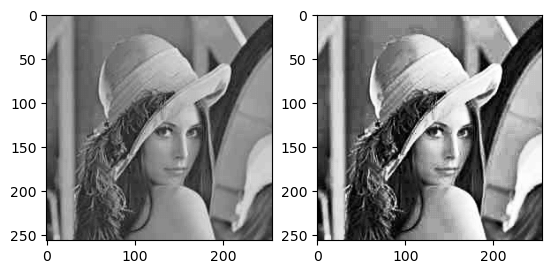

In [ ]:
T_HE = histogram_equalization(src)
res_HE = apply_transformation_func(src, T_HE)

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(src, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')

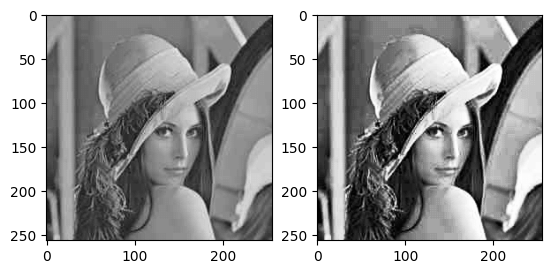

In [6]:
T_HE = histogram_equalization(src)
res_HE = apply_transformation_func(src, T_HE)

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(src, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')

In [ ]:
# Problem 2
# Local Histogram Equalization (Local HE)는 영상을 n by n 블락으로 각각 분할하여 HE를 수행한다
# 앞서 만든 함수를 활용하여 Local HE를 구현하시오.

def local_histogram_equalization(src, block_size = 32):
    
    height, width = src.shape
    
    nblock_i = int(height/block_size)
    nblock_j = int(width/block_size)
    #height와 width를 각 block로 나누어 계산
    #0~block_size-1
    for i in range(nblock_i):
        for j in range(nblock_j):
            # patch =  -> block_size x block_size 의 영상 패치를 가져옵니다.
            patch = src[i- 32: i+32+1, j-32: j+32+1]
            # T_patch = -> histogram equalization 함수를 참고하여 transformation function을 만듭니다.
            T_patch = 
            # HE_patch =  -> 해당 패치에 histogram equalization을 적용합니다.
            # res[(i-1)*block_size:i*block_size, (j-1)*block_size:j*block_size] =  -> 해당 영역을 HE가 적용된 패치로 교체합니다.

    
    return res

In [11]:
#해답 

def local_histogram_equalization(src, block_size = 32):
    
    height, width = src.shape
    res = np.zeros(src.shape, dtype='uint8')
    
    nblock_i = int(height/block_size)
    nblock_j = int(width/block_size)
    #height와 width를 각 block로 나누어 계산
    #0~block_size-1

    for i in range(nblock_i):
        for j in range(nblock_j):
            # patch =  -> block_size x block_size 의 영상 패치를 가져옵니다.
            patch = src[i*block_size: (i+1)*block_size, j*block_size: (j+1)*block_size]
            # T_patch = -> histogram equalization 함수를 참고하여 transformation function을 만듭니다.
            T_patch = histogram_equalization(patch)
            # HE_patch =  -> 해당 패치에 histogram equalization을 적용합니다.
            HE_patch = apply_transformation_func(patch, T_patch)
            # res[(i-1)*block_size:i*block_size, (j-1)*block_size:j*block_size] =  -> 해당 영역을 HE가 적용된 패치로 교체합니다.
            res[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = HE_patch

    
    return res

In [ ]:
#local하게 하면 장점은? 국부적인 local detail이 살아나가됨
#단점은? 전체적인 이미지가 조화를 이루지 못하고 matrix형태로 나눠지게 됨 



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12916\2888916685.py:20: RuntimeWarning: invalid value encountered in true_divide
  pdf = pdf / (height * width)


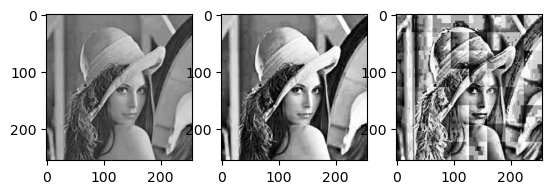

In [ ]:
T_HE = histogram_equalization(src)
res_HE = apply_transformation_func(src, T_HE)
res_LocalHE = local_histogram_equalization(src, 32)

f, axarr = plt.subplots(1,3) 
axarr[0].imshow(src, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')
axarr[2].imshow(res_LocalHE, cmap='gray')

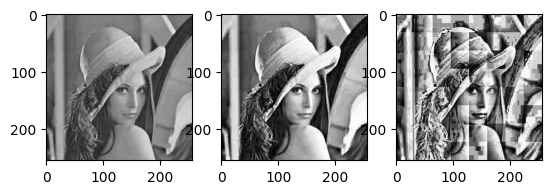

In [12]:
T_HE = histogram_equalization(src)
res_HE = apply_transformation_func(src, T_HE)
res_LocalHE = local_histogram_equalization(src, 32)

f, axarr = plt.subplots(1,3) 
axarr[0].imshow(src, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')
axarr[2].imshow(res_LocalHE, cmap='gray')

In [29]:
# Problem 3
# Huang et al.은 Adaptive Gamma Correction 기반의 화질 개선 기술을 제안하였다 (2012년).
# 해당 링크에 있는 논문을 참조하여 transformation function을 만드시오.
# https://sci-hub.se/10.1109/tip.2012.2226047 의 식 (5)

 



In [30]:
T_AGC = adaptive_gamma_correction(src)
res_AGC = apply_transformation_func(src, T_AGC)

f, axarr = plt.subplots(1,3) 
axarr[0].imshow(src, cmap='gray')
axarr[1].imshow(res_AGC, cmap='gray')

ValueError: ignored

In [ ]:
#그래프-> adaptive gamma correction을 쓰면 
#입력보다 출력이 훨씬 더 밝아지는 현상이 나타남

In [ ]:
# Problem 4
# Park et al.은 Sigmoid function 기반의 화질 개선 기술을 제안하였다 (2019년).
# 해당 링크에 있는 논문을 참조하여 transformation function을 만드시오.
# https://sci-hub.se/10.1109/access.2019.2951583 의 식 (10), (13)
# alpha, beta = 파라메터, L~ => 픽셀 값을 0~1까지로 normalziation 한 값

In [31]:
import math

In [ ]:
#[10]
# alpha, beta = 파라메터, L~ => 픽셀 값을 0~1까지로 normalziation 한 값

def normalization(src, beta):
    
    T = np.zeros(256, dtype='uint8')
    height, width = src.shape
    
    pdf = np.zeros(256)
    cdf = np.zeros(256)
    
    """for i in range(height):
      for j in range(width):
        pdf[src[i,j]] = pdf[[i,j]] + 1
            # pdf[src[i, j]] =  -> 영상을 전체 체크하며 해당 픽셀값의 pdf를 1 증가시킵니다.
    """"        
    

    Lmean 
    cdf[0] = pdf[0]
    for i in range(1, 256):
        # cdf[i] =  -> cdf를 계산해 줍니다.
        cdf[i] = cdf[i-1] + pdf[i]
    
    for i in range(256):
      T[i] = 255 * np.log
    
    beta = 0
    alpha = (np.log(np.mean(src)/255)/(np.log(pdf)))* beta **np.log(np.mean(pdf))
    for i in range(1, 256):
      T[i] = 255*pdf **(alpha*(beta**np.log(pdf)))
    
    
    return T

In [ ]:
#그래프-> adaptive gamma correction을 쓰면 
#입력보다 출력이 훨씬 더 밝아지는 현상이 나타남

In [ ]:
#[13]

math.log(math.e**np.sum(pdf))

In [ ]:
def sigmoid_CE(src, beta = 5):
  T= np.zero(256, dtype ='uint8')
  height, width = src.shape

  pdf = np.zeros(256)
  cdf = np.zeros(256)
  for i in range(height):
    for j in range(width):
        pdf[src[i,j]] = pdf[src[i,j]] + 1

  pdf = pdf/ np.sum(pdf)

  cdf[0] = pdf[0]
  for i in range(1, 256):
    cdf[i] = pdf[i] + cdf[i-1]
  
  L_dash = np.zeros(256):
  for i in range(256):
    L_dash[i] = (i - np.min(src)) /(np.max(src)- np.min(src))
                                                  #영상의 최솟값을 빼줌 
  L_dash_mean = : L_dash[int(np.mean(src))]
  np.clip(L_dash, 0 ,1) 
    
  #지수계산
  alpha = np.log(np.mean(src)/ 255) / np.log(np.mean(L_dash)) *(beta ** np.log(np.mean(L_dash)) 
  #영상의 평균값 = np.mean(src)/255
  exponent = alpha * (beta ** -(np.log(L_dash)) 
  for i in range(256):
    T[i] = 255* 



            HE_patch = apply_transformation_func(patch, T_patch)
            # res[(i-1)*block_size:i*block_size, (j-1)*block_size:j*block_size] =  -> 해당 영역을 HE가 적용된 패치로 교체합니다.
            res[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = HE_patch

    
    return res

In [ ]:
# Problem 4 해답
# Park et al.은 Sigmoid function 기반의 화질 개선 기술을 제안하였다 (2019년).
# 해당 링크에 있는 논문을 참조하여 transformation function을 만드시오.
# https://sci-hub.se/10.1109/access.2019.2951583 의 식 (10), (13)
# alpha, beta = 파라메터, L~ => 픽셀 값을 0~1까지로 normalziation 한 값

def sigmoid_CE(src, beta = 5):
    
    T = np.zeros(256, dtype='uint8')
    height, width = src.shape
    
    pdf = np.zeros(256)
    cdf = np.zeros(256)
    for i in range(height):
        for j in range(width):
            pdf[src[i, j]] =  pdf[src[i, j]] + 1
            
    pdf = pdf / np.sum(pdf)
    
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] =  pdf[i] + cdf[i-1]
    
    L_dash = np.zeros(256)
    for i in range(256):
        L_dash[i] = (i - np.min(src)) / (np.max(src) - np.min(src))
    
    np.clip(L_dash, 0, 1)
    L_dash_mean = L_dash[int(np.mean(src))]
    
    alpha = np.log(np.mean(src)/255) / np.log(L_dash_mean)
    alpha = alpha * (beta ** np.log(L_dash_mean))
    
    exponent = alpha * (beta ** (-np.log(L_dash)))
                        
    for i in range(256):
        T[i] = 255 * (L_dash[i] ** exponent[i])
    
    for i in range(256):
        if(i < np.min(src)):
            T[i] = 0
        elif(i >= np.max(src)):
            T[i] = 255
            
    return T